In [1]:
#from PIL import Image
#from pytesseract import image_to_string
import re
import pubchempy as pcp 
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as ureq
import pybel
from IPython.display import SVG, display, HTML
import pandas as pd
from itertools import takewhile
import numpy as np
from itertools import combinations
df = pd.read_csv('/users/spencertrinh/downloads/NIHMS416874-supplement-2 - Raw.csv',sep=',')
#heterocycle_img = image_to_string(Image.open('/Users/spencertrinh/Desktop/Heterocycle_compounds.jpg'))
#heterocycle_img
#begin_fused_rings = re.search('tetrahydrocyclopenta',heterocycle_img)
#start = begin_fused_rings.start(0)

In [31]:
fused_rings_string = heterocycle_img[start:].replace('\n',' ')

In [74]:
[i for i in re.findall('(?!:\d+[a-z]|[a-z]+\d)[a-z\d]*',fused_rings_string) if i != '']

['tetrahydrocyclopenta',
 'b',
 'pyrrole',
 '1',
 '4',
 'dihydropyrrolo',
 '3',
 '2',
 'b',
 'pyrrole',
 't',
 '2',
 'oxete',
 'thietane',
 'pyrazolidine',
 'o',
 'imidazolidine',
 'iy',
 'o',
 'oxazole',
 'isoxazole',
 'i',
 'ga',
 'pyrazine',
 '1',
 '2',
 '4',
 'triazine',
 '37',
 's',
 '1',
 '3',
 '5',
 'trithiane',
 'morpholine',
 'p',
 'z',
 '8',
 '4',
 'a',
 'v',
 'y',
 '7',
 'w',
 't',
 'cytosine',
 'thymine',
 '6',
 'furo',
 '2',
 '3',
 'b',
 'pyrrole',
 'o',
 'mn',
 'oo',
 '2',
 'thiete',
 'azetidin',
 '2',
 'one',
 'lactam',
 'd',
 'f',
 'i',
 'n',
 '2',
 'pyrazoline',
 '2',
 'imidazoline',
 'pyrazole',
 'imidazole',
 '1',
 '2',
 '4',
 'triazole',
 'p',
 '6',
 '9',
 's',
 'j',
 'r',
 'y',
 'e',
 'g',
 's',
 's',
 'o',
 'o',
 'o',
 'isothiazole',
 'thiazole',
 '1',
 '2',
 'oxathiolane',
 '1',
 '3',
 'oxathiolane',
 '1',
 '2',
 '5',
 'oxadiazole',
 'i',
 'o',
 'o',
 'o',
 'o',
 'o',
 '0',
 '1',
 '3',
 '5',
 'triazine',
 'tetrahydropyran',
 '2',
 'pyran',
 '4',
 'pyran',
 'pyryl

In [101]:
partial_cmpdNames = re.findall('(\w{4,})',fused_rings_string)

In [103]:
with open('/Users/spencertrinh/GitRepos/JupyterNotebook/Juypter-Notebook_mac/partialHeterocycle_list.txt','w') as f:
    for i in partial_cmpdNames:
        f.write(i+'\n')

In [3]:
with open('partialHeterocycle_list.txt','r') as f:
    cmpdNameList = f.readlines()
cmpdNameList

['2,3-dihydro-1H-indene\n',
 'indene\n',
 'indoline\n',
 '3H-indole\n',
 '1H-indole\n',
 '2H-isoindole\n',
 'indolizine\n',
 '1H-indazole\n',
 'benzimidazole\n',
 '7-azaindole\n',
 '4-azaindole\n',
 '5-azaindole\n',
 '6-azaindole\n',
 '7-azaindole\n',
 'pyrazolo[1,5-a]pyrimidine\n',
 'purine\n',
 'benzofuran\n',
 'isobenzofuran\n',
 'benzo[c]thiophene\n',
 'benzo[b]thiophene\n',
 'benzo[d]isoxazole\n',
 'anthranil\n',
 '1,2-benzisothiazole\n',
 '2,1-benzisothiazole\n',
 'benzoxazole\n',
 'benzthiazole\n',
 'benzo[c][1,2,5]thiadiazole\n',
 '1,2-benzisothiazole-3(2H)-one\n',
 'adenine\n',
 'guanine\n',
 'decahydroisoquinoline\n',
 'decahydroquinoline\n',
 'tetrahydroquinoline\n',
 '1,2,-dihydroquinoline\n',
 '1,2-dihydroisoquinoline\n',
 'quinoline\n',
 'isoquinoline\n',
 '4H-quinolizine\n',
 'quinoxaline\n',
 'phthalazine\n',
 'quinazoline\n',
 'cinnoline\n',
 '1,8-naphthyridine\n',
 'pyrido[3,2-d]pyrimidine\n',
 'pyrido[4,3-d]pyrimidine\n',
 'pyrido[3,4-b]pyrazine\n',
 'pyrido[2,3-b]py

In [4]:
smiles_dict={}
try:
    for cmpd in cmpdNameList:
        result = pcp.get_compounds(cmpd, 'name')
        smiles_dict[cmpd.strip()] = result[0].isomeric_smiles
except Exception as e:
    print(f'{cmpd} had issues - {e}')

1,2,-dihydroquinoline
 had issues - list index out of range


In [4]:
smarts_dict = {}
searchlink = 'https://cactus.nci.nih.gov/chemical/structure/{}/file?format=smarts'
for k,v in smiles_dict.items():
    uClient=ureq(searchlink.format(v))
    pagehtml = uClient.read()
    smarts_dict[k] = str(soup(pagehtml,'html.parser')).strip()

In [5]:
#MANUALLY ADD SMARTS STRINGS TO DICTIONARY
# '~' any bond; '@' ring bonds; '*' any atom
smarts_dict = {}
smarts_dict['spiro_ring'] = '[X4;R2;r4,r5,r6](@[r4,r5,r6])(@[r4,r5,r6])(@[r4,r5,r6])@[r4,r5,r6]'
smarts_dict['1,2-dihydroquinoline'] = 'c1cccc-2c1-[#7]-[#6]-[#6]=[#6]-2'
smarts_dict['oxaspiro_3'] = '[#6]-1-[#6]-2(-[#6]-[#6]-[#6]-[#6]-1)-[#6]-[#8]-2'
smarts_dict['fused_bz_ring'] = 'c12ccccc1cccc2'
smarts_dict['fused_cyclohex'] = '[#6]-1-[#6]-2-[#6](-[#6]-[#6]-[#6]-1)-[#6]-[#6]-[#6]-[#6]-2'
smarts_dict['fused_cyclohep_cyclohex'] = '[*]@1@[*]@2@[*](@[*]@[*]@[*]@[*]@1)@[*]@[*]@[*]@[*]@2'
smarts_dict['fused_cyclohep_cyclopent'] = '[*]@1@[*]@[*]@2@[*](@[*]@[*]@[*]@1)@[*]@[*]@[*]@2'
smarts_dict['fused_pyrazine'] = 'c1cccc2c1nc3c(n2)cccc3'
smarts_dict['cholesterol_scaffold'] = '[#6]-2-[#6]-1=[#6]-[#6]-[#6]-3-[#6](-[#6]-1-[#6]-[#6]-[#6]-2)-[#6]-[#6]-[#6]-4-[#6]-3-[#6]-[#6]-[#6]-4'
smarts_dict['fused_pyrazine_2'] = '[#6]-2=[#7]-c1nccnc1-[#6]-[#7]-2'
smarts_dict['fused_dbl_cyclohep'] = '[*]~1~[*]~[*]~2~[*](~[*]~[*]~[*]~1)~[*]~[*]~[*]~[*]~[*]~2'
smarts_dict['fused_dbl_cyclohex'] = '[*]~1~[*]~2~[*](~[*]~[*]~[*]~1)~[*]~[*]~[*]~[*]~2'
smarts_dict['fused_dbl_cyclooct'] = '[*]~1~[*]~[*]~[*]~2~[*](~[*]~[*]~[*]~1)~[*]~[*]~[*]~[*]~[*]~[*]~2'
smarts_dict['fused_cyclooct_cyclonan'] = '[*]~1~[*]~[*]~[*]~2~[*](~[*]~[*]~[*]~[*]~1)~[*]~[*]~[*]~[*]~[*]~[*]~2'
smarts_dict['fused_cyclohex_cyclopent'] = '[*]@1@[*]@2@[*](@[*]@[*]@[*]@1)@[*]@[*]@[*]@2'
smarts_dict['bicyclo_heptane'] = '[*]@1@[*]@2@[*]@[*]@[*]@1@[*]@[*]@2'
smarts_dict['azabicyclo_octane'] = '[*]@1@[*]@[#7]@2@[*]@[*]@[#7]@1@[*]@[*]@2'
smarts_dict['rapamycin_29_rgSz'] = '[*]@2@[*]@[*]@[*]=[*]@[*]=[*]@[*]=[*]@[*]@[*]@[*]@[*]@[*]@[*]@[*]=[*]@[*]@[*]@[*]@[*]@[#8]@[*]@[*]@1@[*]@[*]@[*]@[*]@[#7]@1@[*]@[*]@[*]@[#8]@2'
smarts_dict['avermectin_31_rgSz'] = '[*]@1@[*]@[*]=[*]@[*@@]@2(@[#8]@1)@[*]@[*]@5@[*]@[*](@[#8]@2)@[*]@[*]=[*]@[*]@[*]@[*]=[*]@[*]=[*]@3@[*]@[#8]@[*]@4@[*]@3@[*](@[*]=[*]@[*]@4)@[*]@[#8]@5'


#smarts_dict['bicyclic_ring'] = '[$([*R2]([*R])([*R])([*R]))].[$([*R2]([*R])([*R])([*R]))]'

In [8]:
def LringSize(mol):
    ring_size =[]
    for rgsys in mol.OBMol.GetSSSR():
        ring_size.append(rgsys.Size())
    if not ring_size:
        return 0
    return max(ring_size)


LringSize(genMOL(df.SMILES[57]))

31

In [2]:
def replStr(string):
    return string.replace('#6','*').replace('-','@')

In [3]:
def genMOL(smi):
    return pybel.readstring('smi',smi)

In [4]:
def dplySVGmol(smi,width=450,showNum=False):
    mol = genMOL(smi)
    display(SVG(mol.write('svg',opt={'P':width,'i':showNum})))

In [5]:
def convertSMItoSMRT(smi):
    smarts_dict = {}
    searchlink = 'https://cactus.nci.nih.gov/chemical/structure/{}/file?format=smarts'
    uClient=ureq(searchlink.format(smi))
    pagehtml = uClient.read()
    return str(soup(pagehtml,'html.parser')).strip()

In [7]:
def grabSMI(name):
    res = pcp.get_compounds(name,'name')
    smi = res[0].isomeric_smiles
    return smi

In [8]:
def addSMRTdict(name):
    smi = grabSMI(name)
    smarts = convertSMItoSMRT(smi)
    smarts_dict[name] = smarts
    print(f'{smarts_dict[name]} was added')

In [9]:
def takeAtomOvLap(atomSet_1,atomSet_2):
     for a in atomSet_1: 
        if a in atomSet_2:
            #print(a)
            return True
            break
        else:
             continue


In [10]:
def checkSmarts(smarts,smiles):
    smarts = pybel.Smarts(smarts)
    mol = genMOL(smiles)
    return smarts.findall(mol)

In [177]:
from itertools import dropwhile,takewhile

def unique(it):
    it = iter(it)
    try:
        next(dropwhile(lambda e, f=next(it): e == f, it))
        #will drop the elements that are the same from the iterable list, 'it'; 
        #since dropwhile will return a list, we wrap it with 'next' to get to 
        #the next element
    except StopIteration:
        return True
    else:
        return False

features = [('a','b'), ('c','b'), ('a','d')]
unique(g for f, g in features)

False

In [10]:
def compareIdxMatch(lstOfIdxs_1,lstOfIdxs_2):
    '''takes each element (put into list) that is a match from list1 
    compared to list2 until there is no match; 
    it stops there to not waste computation'''
    return list(takewhile(lambda c : c in lstOfIdxs_1,lstOfIdxs_2 ))

In [10]:
def parseRngSys(smi):
    '''OLD way of doing it; not as efficient; round-about way, also cannot handle 
    large molecules and ones with big rings or multiple rings; uses a dictionary of 
    SMARTS pattern to iterate thru;
    
    use to view the molecule with highlighted region'''
    
    count_ringSys=0
    MATCH_LST=[]
    mol = genMOL(smi)
    cnt=0
    highlighter = pybel._operations['highlight']
    ringCnt = len(mol.OBMol.GetSSSR())
    for n,sm in smarts_dict.items():
        SMARTS = pybel.Smarts(sm)
        MATCH_IDX = SMARTS.findall(mol)
        if MATCH_IDX:        
            MATCH_IDX = [*MATCH_IDX[0]]
            if not compareIdxMatch(MATCH_LST,MATCH_IDX):
                MATCH_LST.extend(MATCH_IDX)
                #print(compareIdxMatch(MATCH_LST,MATCH_IDX))
                count_ringSys+=1
                highlighter.Do(mol.OBMol,sm+' red')
    return (mol,count_ringSys,ringCnt)

In [ ]:
def parseRngSys(smi):
    #deleted and did not remember the rest of the code
    highlighter = pybel._operations['highlight']
    mol = genMOL(smi)
    for k,smarts_str in smarts_dict.items():
        smarts = pybel.Smarts(smarts_str)
        if smarts.findall(mol):    
            highlighter.Do(mol.OBMol, smarts_str +' red')

    mol =  mol.write('svg',opt={"u":None,"C":None,"P":350,'b':'transparent','B':'black','d':None} )
    count_ringSys = 
    return (mol,count_ringSys,ringCnt)

1 -indx: 57, name:Daptomycin, ringSys: 1, IsolRings: 2


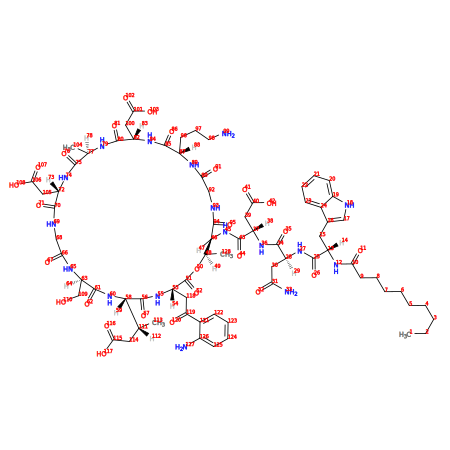

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


2 -indx: 58, name:MidecamycinA1, ringSys: 0, IsolRings: 3


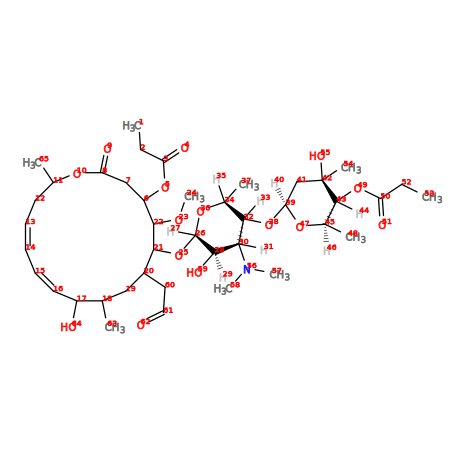

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


3 -indx: 59, name:EchinocandinB, ringSys: 1, IsolRings: 1


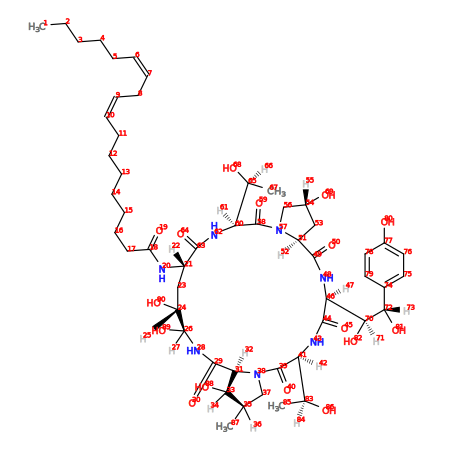

[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]]


4 -indx: 60, name:CalicheamicinG1, ringSys: 10, IsolRings: 5


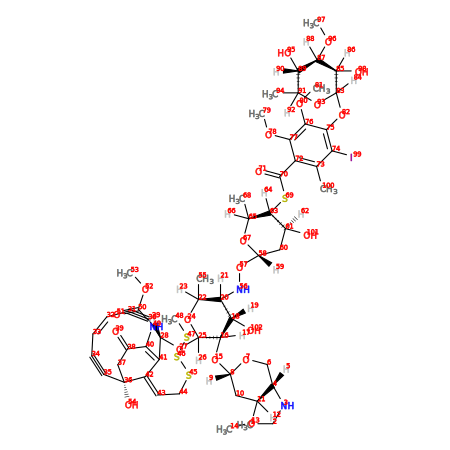

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1.]]


5 -indx: 61, name:Validamycin, ringSys: 0, IsolRings: 3


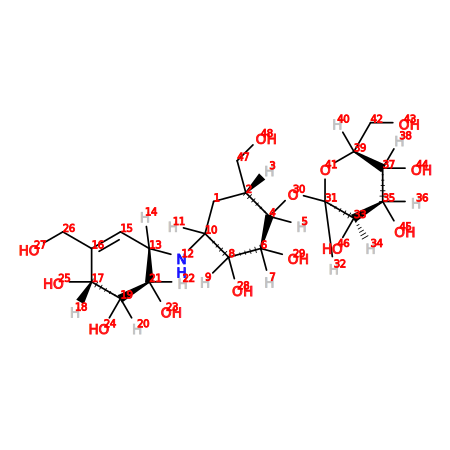

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


6 -indx: 62, name:CyclosporinA, ringSys: 0, IsolRings: 1


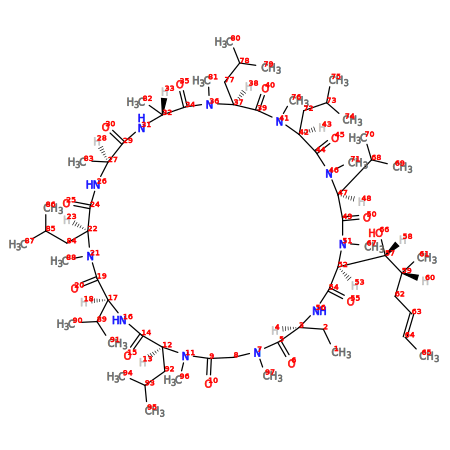

[[1.]]


7 -indx: 63, name:FK506, ringSys: 1, IsolRings: 1


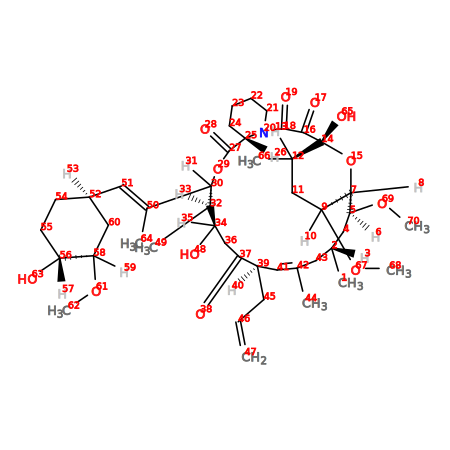

[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]]


8 -indx: 64, name:Lipstatin, ringSys: 0, IsolRings: 1


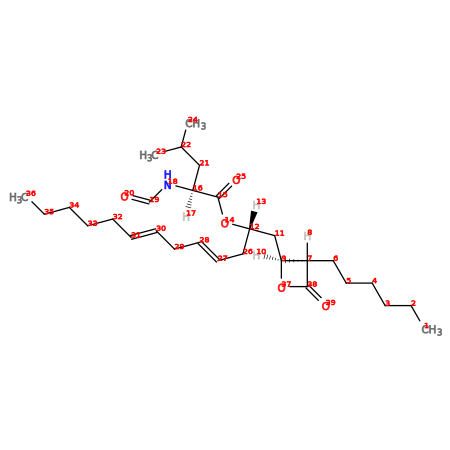

[[1.]]


9 -indx: 65, name:Geldanamycin, ringSys: 1, IsolRings: 0


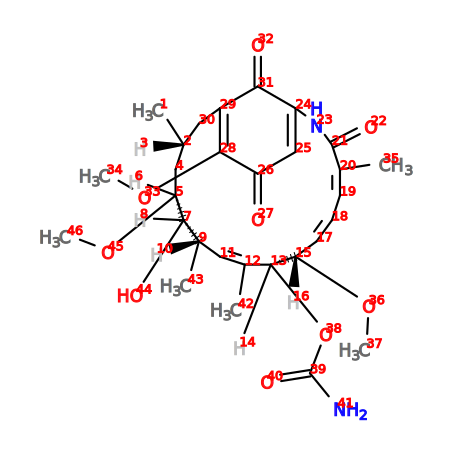

[[1. 1.]
 [1. 1.]]


10 -indx: 66, name:Actinonin, ringSys: 0, IsolRings: 1


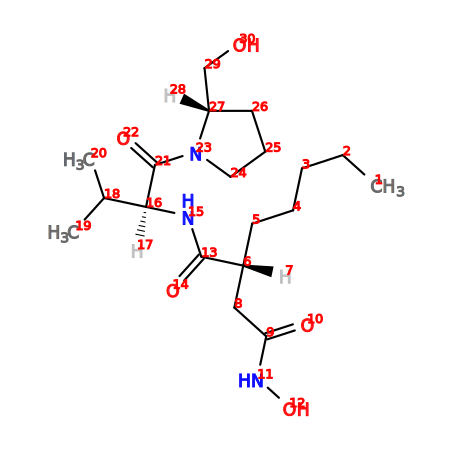

[[1.]]


11 -indx: 67, name:Discodermolide, ringSys: 0, IsolRings: 1


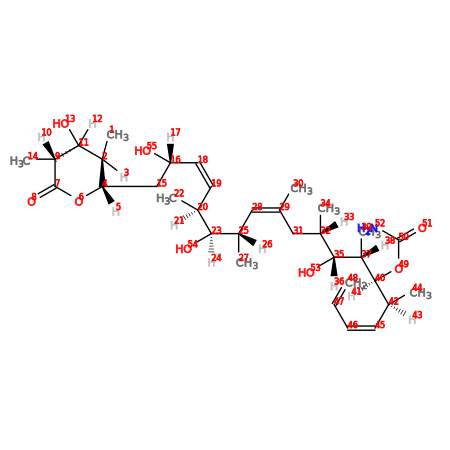

[[1.]]


12 -indx: 68, name:Monensin, ringSys: 3, IsolRings: 3


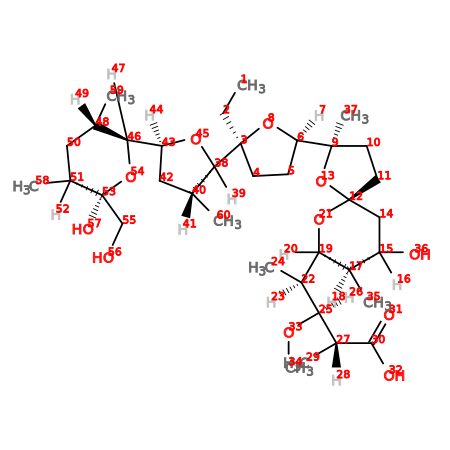

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


13 -indx: 69, name:CalyculinA, ringSys: 0, IsolRings: 1


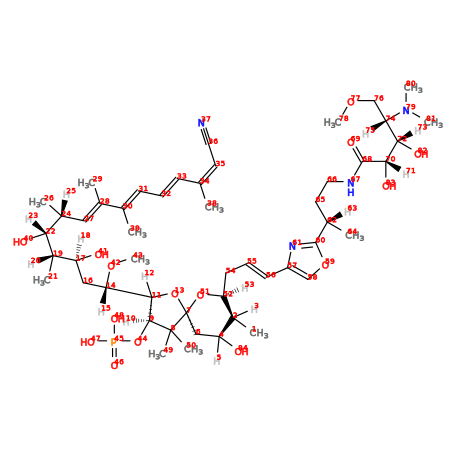

[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]]


14 -indx: 70, name:AmphotericinB, ringSys: 0, IsolRings: 1


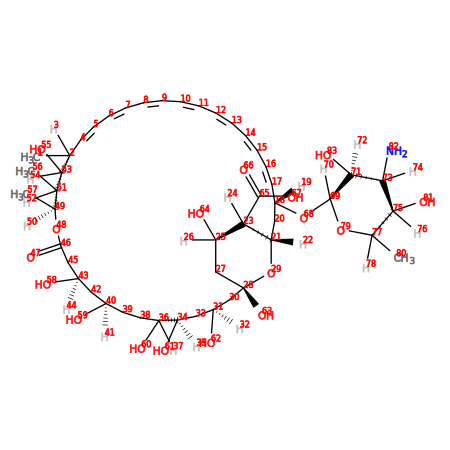

[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]]


15 -indx: 71, name:Adriamycin, ringSys: 0, IsolRings: 1


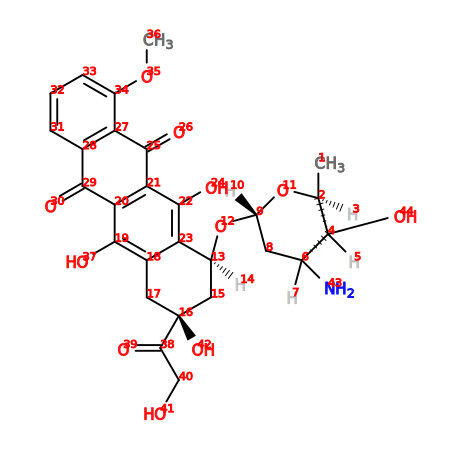

[[1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]


(1,0) : [0, 1, 2, 3, 4]
(2,0) : [0, 1, 2, 3, 4]
(2,1) : [0, 1, 2, 3, 4]
(3,0) : [0, 1, 2, 3, 4]
(3,1) : [0, 1, 2, 3, 4]
(3,2) : [0, 1, 2, 3, 4]
(4,0) : [1, 2, 3, 4]
(4,1) : [1, 2, 3, 4]
(4,2) : [1, 2, 3, 4]
(4,3) : [1, 2, 3, 4]
(5,0) : [0, 1, 2, 3, 4]
(5,1) : [0, 1, 2, 3, 4]
(5,2) : [0, 1, 2, 3, 4]
(5,3) : [0, 1, 2, 3, 4]
(5,4) : [0, 1, 2, 3, 4]
16 -indx: 72, name:GinkgolideB, ringSys: 2, IsolRings: 0


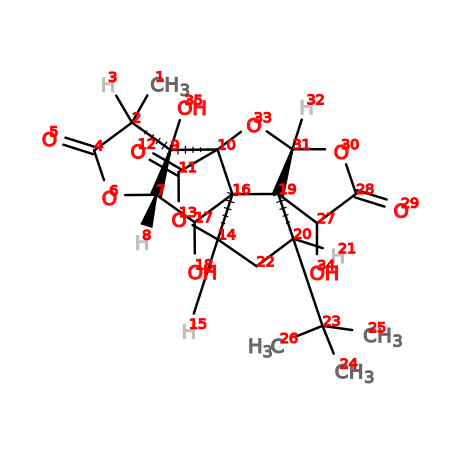

[[1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1.]]


(1,0) : []
(2,0) : []
(2,1) : [0, 1, 2]
(3,0) : []
(3,1) : [0, 1, 2]
(3,2) : [0, 1, 2]
17 -indx: 73, name:PhorbolMA, ringSys: 2, IsolRings: 0


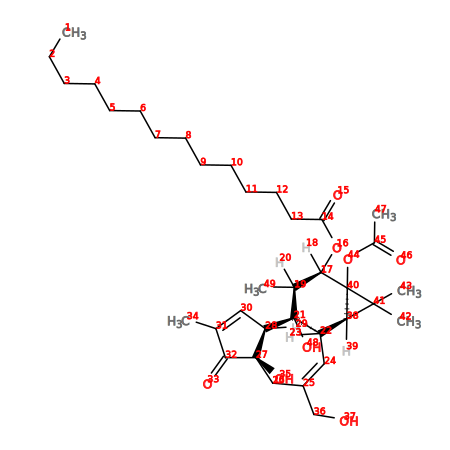

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 1. 1.]]


18 -indx: 74, name:Vancomycin, ringSys: 2, IsolRings: 2


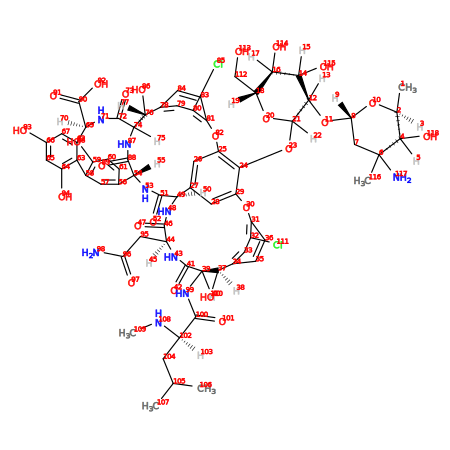

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 1. 1. 1.]]


19 -indx: 75, name:TrapoxinB, ringSys: 3, IsolRings: 3


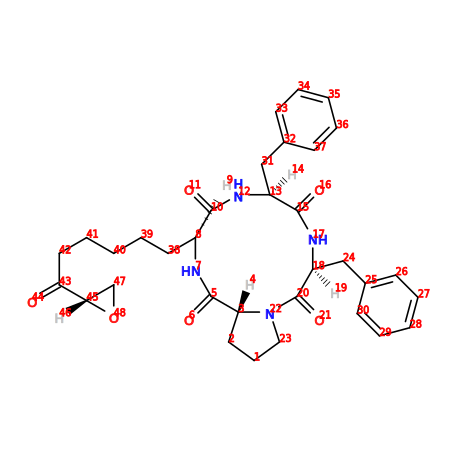

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]]


(1,0) : []
(2,0) : []
(2,1) : [1, 4, 5, 6]
(3,0) : []
(3,1) : [0, 7]
(3,2) : []
(4,0) : []
(4,1) : [0, 7]
(4,2) : []
(4,3) : []
(5,0) : []
(5,1) : [1, 2, 5]
(5,2) : []
(5,3) : []
(5,4) : []
(6,0) : []
(6,1) : [1, 2, 5, 6]
(6,2) : []
(6,3) : []
(6,4) : []
(6,5) : [1, 2, 5, 6]
(7,0) : []
(7,1) : [1, 2, 6]
(7,2) : []
(7,3) : []
(7,4) : []
(7,5) : [1, 2, 6]
(7,6) : [1, 2, 6]
(8,0) : []
(8,1) : [0, 3, 4]
(8,2) : []
(8,3) : []
(8,4) : []
(8,5) : [0, 3, 4]
(8,6) : [0, 3, 4]
(8,7) : []
20 -indx: 76, name:Vincristine, ringSys: 7, IsolRings: 0


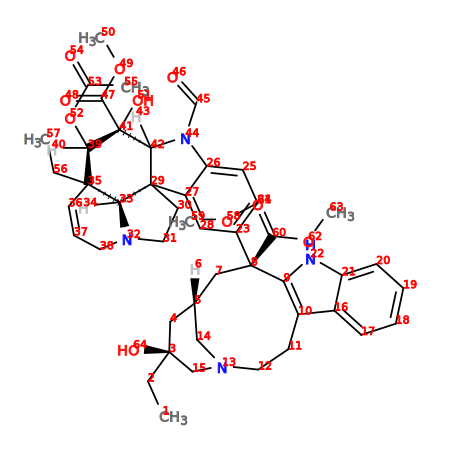

[[1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1.]]


21 -indx: 77, name:Colchicine, ringSys: 1, IsolRings: 0


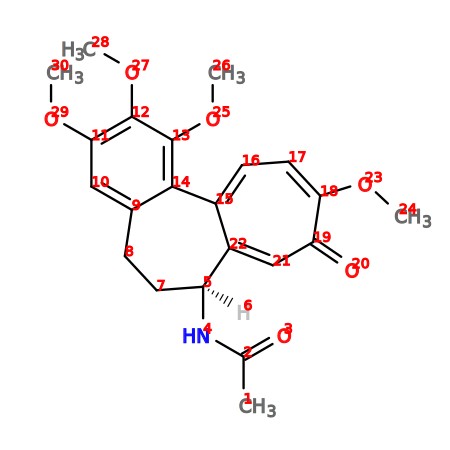

[[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]


22 -indx: 78, name:Trichostatin, ringSys: 0, IsolRings: 1


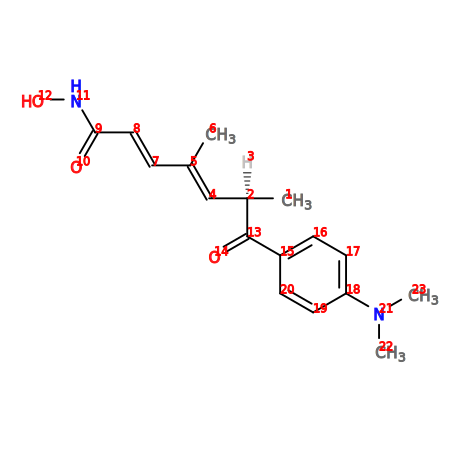

[[1.]]


23 -indx: 79, name:Fumagillin, ringSys: 0, IsolRings: 1


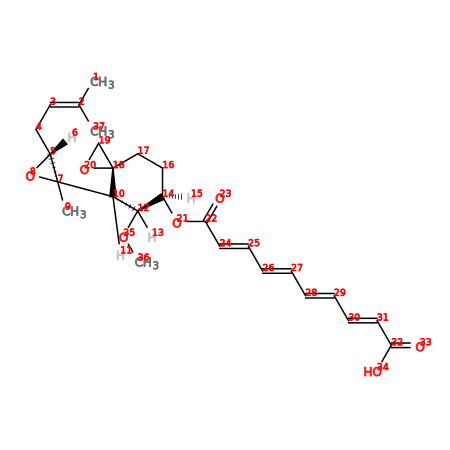

[[1. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]]




In [307]:
count = 0
for name, smi in zip(df['Unnamed: 0'][57:80],df.SMILES[57:80]):
    try:
        count+=1
        data = cntRgSys(smi)
        print(f'{count} -indx: {df.index[df.SMILES == smi].tolist()[0]}, name:{name}, ringSys: {data[0]}, IsolRings: {data[1]}') #smiles:{smi} )
        dplySVGmol(smi)
        print(genMatrixOutset(smi))
        print('\n ==================== \n')
    except Exception as e:
        print(f'''\t=======================================\n
                  \t=ERROR PARSING {name} : {count} - {e} =\n
                  \t=======================================\n''')

In [ ]:
count = 0
for name,smi in zip(df['Unnamed: 0'][50:100],df.SMILES[50:100]):
    try:
        count+=1
        ringSys_mol_tuple = parseRngSys(smi)
        mol,count_ringSys,ringCnt = ringSys_mol_tuple
        if count_ringSys:
            print(f'{count} - name:{name}, smiles:{smi}, ringSysCount:{ringCnt - count_ringSys}')
            display(SVG(mol.write('svg',opt={'P':350})))
        else:
            print(f'{count} - name:{name}, smiles:{smi}, ringSysCount:{ringCnt}')
            display(SVG(mol.write('svg',opt={'P':350})))
    except TypeError as e:
        print(f'{smi} has issues - {e}')

1 - name:Rapamycin, smiles:C[C@@H]1CCC2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC, ringSysCount:3


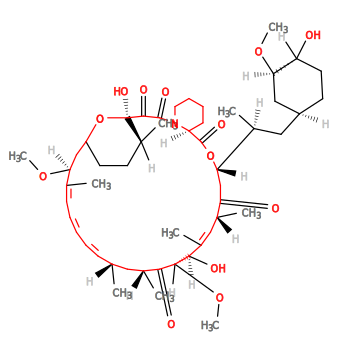

2 - name:AvermectinB1a, smiles:CC[C@H](C)[C@@H]1[C@H](C=C[C@@]2(O1)C[C@@H]3C[C@H](O2)C\C=C(\[C@H]([C@H](\C=C\C=C\4/CO[C@H]5[C@@]4([C@@H](C=C([C@H]5O)C)C(=O)O3)O)C)O[C@H]6C[C@@H]([C@H]([C@@H](O6)C)O[C@H]7C[C@@H]([C@H]([C@@H](O7)C)O)OC)OC)/C)C, ringSysCount:4


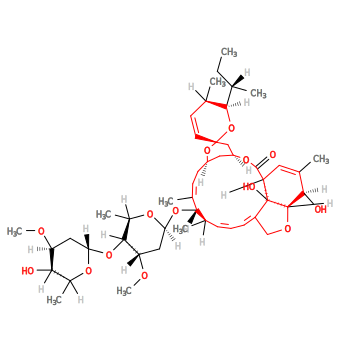

In [590]:
count = 0
for name,smi in zip(df['Unnamed: 0'][54:56],df.SMILES[54:56]):
    try:
        count+=1
        ringSys_mol_tuple = parseRngSys(smi)
        mol,count_ringSys,ringCnt = ringSys_mol_tuple
        if count_ringSys:
            print(f'{count} - name:{name}, smiles:{smi}, ringSysCount:{ringCnt - count_ringSys}')
            display(SVG(mol.write('svg',opt={'P':350})))
        else:
            print(f'{count} - name:{name}, smiles:{smi}, ringSysCount:{ringCnt}')
            display(SVG(mol.write('svg',opt={'P':350})))
    except TypeError as e:
        print(f'{smi} has issues - {e}')

In [34]:
def cntRngSys(smi):
    '''iterate thru all atoms of molecule and see if it resides in ring; it if does
    then add to a list; compare that list to another iteration of a ring to find 
    determine if overlap exists; if there is overlap then they are a fused ring system
    '''
    mol = genMOL(smi)
    rings_dict_iter = {f'ring_{i}':r for i,r in enumerate(mol.OBMol.GetSSSR())}
    rings_dict_part_of_RgSys ={}
    masterIdxList = []
    ringSysCount=0
    ringOverlap = []
    tmp_lst = [] 
    ringCnt = len(rings_dict_iter.keys())
    one_fused_sys = False 
    multiple_fused = 0
    multiple_fused_boolean  = False
    cntAloneRing=0
    cntEmptyIdx = 0
    linear_fused = 0
    linear_fused_boolean = False
    for nbr,r in rings_dict_iter.items():
        for a in mol:
            if r.IsInRing(a.OBAtom.GetIdx()):
                tmp_lst.append(a.OBAtom.GetIdx())
        rings_dict_part_of_RgSys[nbr] = tmp_lst        
        masterIdxList.extend(tmp_lst)
        tmp_lst = []        

    for v in rings_dict_part_of_RgSys.values():
        for v_ in rings_dict_part_of_RgSys.values():
            tmp_lst = list(takewhile(lambda x : x in v, v_ ))
            ringOverlap.append(tmp_lst)
        lenRgOvLap = len([i for i in ringOverlap if i])
 
        if lenRgOvLap == ringCnt:
            one_fused_sys = True
            break 
             
        if ringCnt>=4 and lenRgOvLap>2:
            multiple_fused_boolean = True
            multiple_fused +=1
            for j in ringOverlap:
                if not j:
                    cntEmptyIdx +=1

            if cntEmptyIdx/ringCnt == 1/ringCnt:
                cntAloneRing +=1
        
        if ringCnt>=4 and lenRgOvLap in [2,3]:
            #for linear fused rings each ring will have at 
            #least 2 connections and max 3 (with itself)
            linear_fused_boolean = True
            linear_fused +=1
            
        if lenRgOvLap == 2:
            ringSysCount+=1
             
        ringOverlap = []                   
    
    if linear_fused_boolean:
        #check to see if most fused rings are part of the same linear system;
        #couldn't figure out why brevetoxin had two rings with only overlap with
        #itself; so devised a way to take the rounded number of overlapped rings 
        #over the ring count
        ringSysCount = linear_fused/ringCnt
        if ringSysCount < 0.8:
            linear_fused_boolean = False
    
    if not one_fused_sys and not multiple_fused_boolean and not linear_fused_boolean: 
        return ringCnt - ringSysCount
    elif multiple_fused_boolean and not linear_fused_boolean:
        print('multiple')
        return cntAloneRing + multiple_fused
    elif linear_fused_boolean: 
        print('linear')
        return ringSysCount 
    else:
        return 1 #return just one ring system since they are all connected

In [51]:
ringOverLap = []
ringCnt = len(mol.OBMol.GetSSSR())
cntAloneRing=0
multiple_fused = 0
for k,v in rings_dict_part_of_RgSys.items():
    print(k)
    for v_ in rings_dict_part_of_RgSys.values():
        print(list(takewhile(lambda x : x in v, v_ )))
        tmp_lst = list(takewhile(lambda x : x in v, v_ )) 
        ringOverlap.append(tmp_lst)
    lenOvLp = len([i for i in ringOverlap if i])
    if lenOvLp == ringCnt: 
        break
    if ringCnt>=4 and lenOvLp>2:
        
        multiple_fused +=1
        for j in ringOverlap:
            print(j)
            #if not j:
                #cntAloneRing +=1
             
        
    ringOverlap=[]
print(cntAloneRing+multiple_fused)

ring_0
[31, 32, 33, 34, 36]
[]
[]
[34, 36]
[]
[]
[]
ring_1
[]
[6, 8, 10, 11, 12, 13]
[12]
[]
[]
[]
[]
ring_2
[]
[]
[12, 14, 15, 17, 18, 20]
[]
[]
[]
[15, 17, 18]
ring_3
[]
[]
[]
[34, 36, 37, 39, 40, 41]
[]
[]
[]
ring_4
[]
[]
[]
[]
[51, 53, 54, 56, 58, 60]
[]
[]
ring_5
[]
[]
[]
[]
[]
[63, 65, 66, 68, 70, 72]
[]
ring_6
[31]
[]
[]
[]
[]
[]
[15, 17, 18, 21, 22, 23, 24, 26, 28, 29, 30, 31, 36, 37, 45, 47]
0


In [41]:
smi = df.SMILES[55]
mol = genMOL(smi)
rings_dict_iter = {f'ring_{i}':r for i,r in enumerate(mol.OBMol.GetSSSR())}
rings_dict_part_of_RgSys ={}
masterIdxList = []
ringSysCount=0
ringOverlap = []
tmp_lst = [] 

for nbr,r in rings_dict_iter.items():
    for a in mol:
        if r.IsInRing(a.OBAtom.GetIdx()):
            tmp_lst.append(a.OBAtom.GetIdx())
    rings_dict_part_of_RgSys[nbr] = tmp_lst        
    masterIdxList.extend(tmp_lst)
    tmp_lst = []        

for v in rings_dict_part_of_RgSys.values():
    for v_ in rings_dict_part_of_RgSys.values():
        tmp_lst = list(takewhile(lambda x : x in v, v_ ))
        ringOverlap.append(tmp_lst)
    lenRgOvLap = len([i for i in ringOverlap if i])
    if lenRgOvLap != 1:
        ringSysCount+=1

    ringOverlap = []

In [ ]:
def cntRngSys_(smi):
    '''iterate thru all atoms of molecule and see if it resides in ring; it if does
    then add to a list; compare that list to another iteration of a ring to find 
    determine if overlap exists; if there is overlap then they are a fused ring system
    '''
    mol = genMOL(smi)
    masterIdxList = []
    ringSysCount=0
    ringOverlap = []
    tmp_lst = [] 
    rings = [r for r in mol.OBMol.GetSSSR()]
    ringCnt = len(rings) 
    atomSet={}
    one_fused_sys = False 
    multiple_fused = 0
    multiple_fused_boolean  = False
    cntAloneRing=0
    cntEmptyIdx = 0
    linear_fused = 0
    linear_fused_boolean = False
     
    for i,r in enumerate(rings):
        atomSet[f'ring_{i}']=[]
        for a in mol:
             if r.IsInRing(a.OBAtom.GetIdx()):
                    atomSet[f'ring_{i}'].append(a.idx)
                    
    for v in atomSet.values(): 
        for v_ in atomSet.values():
            takeAtomOvLap(v_,v)
                ringOverlap.append(tmp_lst)
        lenRgOvLap = len([i for i in ringOverlap if i])
 
        if lenRgOvLap == ringCnt:
            one_fused_sys = True
            break 
             
        if ringCnt>=4 and lenRgOvLap>2:
            multiple_fused_boolean = True
            multiple_fused +=1
            for j in ringOverlap:
                if not j:
                    cntEmptyIdx +=1

            if cntEmptyIdx/ringCnt == 1/ringCnt:
                cntAloneRing +=1
        
        if ringCnt>=4 and lenRgOvLap in [2,3]:
            #for linear fused rings each ring will have at 
            #least 2 connections and max 3 (with itself)
            linear_fused_boolean = True
            linear_fused +=1
            
        if lenRgOvLap == 2:
            ringSysCount+=1
             
        ringOverlap = []                   
    
    if linear_fused_boolean:
        #check to see if most fused rings are part of the same linear system;
        #couldn't figure out why brevetoxin had two rings with only overlap with
        #itself; so devised a way to take the rounded number of overlapped rings 
        #over the ring count
        ringSysCount = linear_fused/ringCnt
        if ringSysCount < 0.8:
            linear_fused_boolean = False
    
    if not one_fused_sys and not multiple_fused_boolean and not linear_fused_boolean: 
        return ringCnt - ringSysCount
    elif multiple_fused_boolean and not linear_fused_boolean:
        print('multiple')
        return cntAloneRing + multiple_fused
    elif linear_fused_boolean: 
        print('linear')
        return ringSysCount 
    else:
        return 1 #return just one ring system since they are all connected

In [63]:
#smi = df.SMILES[57]
smi = grabSMI('duocarmycin A')
mol = genMOL(smi)

rings = [r for r in mol.OBMol.GetSSSR()]
ringCnt = len(rings)
arr = np.zeros((ringCnt,ringCnt))
cnt = 0
atomSet = {}

for i,r in enumerate(rings):
    atomSet[f'ring_{i}']=[]
    for a in mol:
         if r.IsInRing(a.OBAtom.GetIdx()):
                atomSet[f'ring_{i}'].append(a.idx)

for r,aidx in atomSet.items(): 
    #print(k)
    for i,aidx_ in enumerate(atomSet.values()):
            arr[cnt,i] = 1 if takeAtomOvLap(aidx,aidx_) else 0
    #print(len([tr for tr in fused_nbrs if tr != None]))
    cnt+=1

if np.array_equal(np.eye(ringCnt),arr):
    print(0,ringCnt)
#sumarr=arr.sum(axis=0)
#central_ring_index = np.where(sumarr==max(sumarr))[0][0]
#central_ring_lst = [i for i in arr[central_ring_index]]
#no_connects = [i for i, x in enumerate(central_ring_lst) if x == 0] 
#checkThisIdx =[] 
#extended_ring = 0

#for no_con_idx in no_connects: 
    #print(np.where(arr[no_con_idx]==1)[0])
 #   tmp=np.where(arr[no_con_idx]==1)[0]
  #  for i in tmp:
  #      if i != no_con_idx:
   #         checkThisIdx.append((no_con_idx,i))
            
#for i,j in checkThisIdx:
 #   if arr[j][central_ring_index] == 1:
  #      print(f'there is an extended ring system; ring #: {i}')
  #      central_ring_lst[i] = 1.0 

In [186]:
isolatedRings=0
ringsysSet ={}
isolatedRings_idx =[]
ringSysCnt=0

def rgSet(smi,arr):
    mol = genMOL(smi)
    rings = [r for r in mol.OBMol.GetSSSR()]
    ringCnt = len(rings)
    cnt = 0
    ringsysSet = {}
    for i in range(ringCnt):
        ringsysSet[f'ring{i}'] = []
        for j in range(ringCnt):
            inner_prod = np.inner(arr[i],arr[j])
            ringsysSet[f'ring{i}'].append(inner_prod)
#         if sum(ringsysSet[f'ring{i}']) == 0:
#             isolatedRings+=1
#             isolatedRings_idx.append(i)
    return ringsysSet


for i in range(ringCnt):
    #print(f'[{i}] =====]')
    ringsysSet[f'ring{i}'] = []
    for j in range(ringCnt):
        #if j == i:
        #    pass
        #else:
        inner_prod = np.inner(arr[i],arr[j])
        #print(f'{j}:{np.inner(arr[i],arr[j])}')
        ringsysSet[f'ring{i}'].append(inner_prod)
    if sum(ringsysSet[f'ring{i}']) == 0:
        isolatedRings+=1
        isolatedRings_idx.append(i)
        
fusedRings = [i for i in range(ringCnt) if i not in isolatedRings_idx]

for i,j in enumerate(fusedRings):
    tmp_arr = np.delete(np.delete(arr,j,0),j,1) # 0 axis (x) and 1 axis (y)
    if tmp_arr[j:,j:].shape == (1,1): 
        break
    if all(np.diag(tmp_arr[j:,j:])): #if matrix as all one's on diagonal (fused connection)
        if np.all(tmp_arr[j:,j:].T == tmp_arr[j:,j:]):
            #unique, counts = np.unique(arr, return_counts=True)
            #cntDict = dict(zip(unique, counts))
            #if cntDict[0.0] == cntDict[1.0]:
            #if i in set(tmp_arr.sum(axis=0)):
            maxIdxVals=[]
            for a,b in enumerate(range(tmp_arr.shape[0])):
                maxIdxVals.append(tmp_arr[b].sum())
            maxIdx = maxIdxVals.index(max(maxIdxVals))
            if tmp_arr[:,maxIdx].sum() == tmp_arr.shape[0]:
                ringSysCnt+=1
                
if len(set(arr.sum(axis=0))) == 1:
    ringSysCnt+=1
print(f'rgSys: {ringSysCnt}, isoRg: {isolatedRings}')

rgSys: 0, isoRg: 0


In [249]:
def genMatrixOutset(smi):
    mol = genMOL(smi)
    atomSet = {}
    rings = [r for r in mol.OBMol.GetSSSR()]
    ringCnt = len(rings)
    cnt=0
    arr = np.zeros((ringCnt,ringCnt))
    for i,r in enumerate(rings):
        atomSet[f'ring_{i}']=[]
        for a in mol:
             if r.IsInRing(a.OBAtom.GetIdx()):
                    atomSet[f'ring_{i}'].append(a.idx)

    for r,aidx in atomSet.items(): 
        for i,aidx_ in enumerate(atomSet.values()):
                arr[cnt,i] = 1 if takeAtomOvLap(aidx,aidx_) else 0
        cnt+=1
    return arr

In [258]:
rgChked =[]
ringCnt = 5
fusedIdx = []
d = rgSet(df.SMILES[94],genMatrixOutset(df.SMILES[94]))
for i,v in enumerate(d.values()):
    for j in range(len(d.keys())):
        if i == j:
            pass
        else:
            if j not in rgChked and (i,j) not in list(combinations(range(ringCnt),2)):
                tmp = [i for i,el in enumerate(v) if el != 0 and d[f'ring{j}'][j] != 0]
                fusedIdx.append(tmp)
                print(f"({i},{j}) : {tmp}")
    rgChked.append(j)
fusedIdx

ringSysCnt = len([list(x) for x in set(tuple(x) for x in fusedIdx)])
ringSysCnt

(1,0) : [0, 1, 3]
(2,0) : [2, 4]
(2,1) : [2, 4]
(3,0) : [0, 1, 3]
(3,1) : [0, 1, 3]
(3,2) : [0, 1, 3]
(4,0) : [2, 4]
(4,1) : [2, 4]
(4,2) : [2, 4]
(4,3) : [2, 4]


2

In [270]:
tryCntArr_2(genMatrixOutset(df.SMILES[94]),d,5)

(1,0) : [0, 1, 3]
(2,0) : [2, 4]
(2,1) : [2, 4]
(3,0) : [0, 1, 3]
(3,1) : [0, 1, 3]
(3,2) : [0, 1, 3]
(4,0) : [2, 4]
(4,1) : [2, 4]
(4,2) : [2, 4]
(4,3) : [2, 4]


2

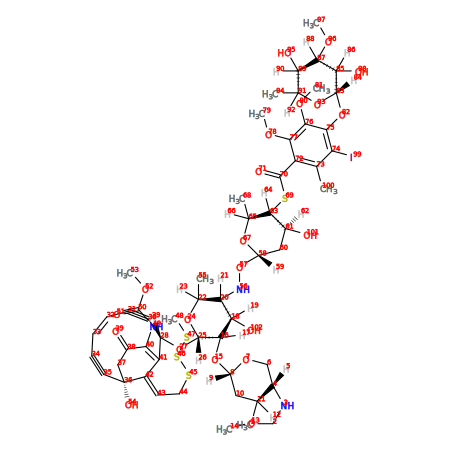

In [308]:
dplySVGmol(df.SMILES[60])

In [309]:
a = genMatrixOutset(df.SMILES[60])
arrSum = arr.sum(axis=0)
fusedRgPos = np.where(arrSum == arrSum.max())[0]
d = rgSet(df.SMILES[60],a)
tryCntArr_1(a,d,5)

0

In [311]:
cntRgSys(df.SMILES[60])

(10, 5)

In [310]:
def cntRgSys(smi):
    
    isolatedRings=0
    ringsysSet ={}
    #isolatedRings_idx =[]
    ringSysCnt=0
    mol = genMOL(smi)
    atomSet = {}

    rings = [r for r in mol.OBMol.GetSSSR()]
    ringCnt = len(rings)
    
    if ringCnt == 0:
        return 0
    else:
        arr = genMatrix(mol,rings,ringCnt)
        if np.array_equal(np.eye(ringCnt), arr):
            return (0,ringCnt)
        else:    
            for i in range(ringCnt):
                ringsysSet[f'ring{i}'] = []
                for j in range(ringCnt):
                    if j == i:
                        pass
                    else:
                        inner_prod = np.inner(arr[i],arr[j])
                        ringsysSet[f'ring{i}'].append(inner_prod)
                if sum(ringsysSet[f'ring{i}']) == 0:
                    isolatedRings+=1
                    #isolatedRings_idx.append(i)
            ringSysCnt = tryCntArr_1(arr,ringsysSet,isolatedRings)
            if ringSysCnt == 0 and isolatedRings ==0 and ringCnt >0:
                print('method 2')
                ringSysCnt = tryCntArr_2(arr,ringsysSet,ringCnt)
    return (ringSysCnt,isolatedRings)

def genMatrix(mol,rings,ringCnt):
    arr = np.zeros((ringCnt,ringCnt))
    cnt = 0
    atomSet = {}
    for i,r in enumerate(rings):
        atomSet[f'ring_{i}']=[]
        for a in mol:
             if r.IsInRing(a.OBAtom.GetIdx()):
                    atomSet[f'ring_{i}'].append(a.idx)

    for r,aidx in atomSet.items(): 
        for i,aidx_ in enumerate(atomSet.values()):
                arr[cnt,i] = 1 if takeAtomOvLap(aidx,aidx_) else 0
        cnt+=1
    return arr
        
def tryCntArr_1(arr,ringsysSet,isolatedRings):
    ringSysCnt = 0
    arrSum = arr.sum(axis=0)
    fusedRgPos = np.where(arrSum == arrSum.max())[0]
    unconnectedRgs = np.argwhere(arr[:,fusedRgPos]==0)
    if len(unconnectedRgs) == isolatedRings:
        ringSysCnt = 1
    else:
        pair = list(combinations([i[0] for i in unconnectedRgs],2))
        for p in set(pair): 
            if p[0] != p[1]:
                if ringsysSet[f'ring{p[0]}'] == ringsysSet[f'ring{p[1]}']:
                     ringSysCnt +=1
    return ringSysCnt

def tryCntArr_2(arr,ringsysSet,ringCnt):
    rgChked =[]
    fusedIdx = []
    for i,v in enumerate(ringsysSet.values()):
        for j in range(len(ringsysSet.keys())):
            if i == j:
                pass
            else:
                if j not in rgChked and (i,j) not in list(combinations(range(ringCnt),2)):
                    tmp = [i for i,el in enumerate(v) if el != 0 and ringsysSet[f'ring{j}'][j] != 0]
                    fusedIdx.append(tmp)
                    print(f"({i},{j}) : {tmp}")
        rgChked.append(j)
    ringSysCnt = len([list(x) for x in set(tuple(x) for x in fusedIdx)])
    return ringSysCnt
        
     

In [12]:
def cntRingSys(smi):
    mol = genMOL(smi)
    connectedRings = []
    isolatedRings = []
    rings = [r for r in mol.OBMol.GetSSSR()]
    ringCnt = len(rings)
    if ringCnt == 0:
        return 0
    else:
        arr = np.zeros((ringCnt,ringCnt))
        cnt = 0
        ringSysCnt = 0
        atomSet = {}
        ringsysSet = {}

        for i,r in enumerate(rings):
            atomSet[f'ring_{i}']=[]
            for a in mol:
                 if r.IsInRing(a.OBAtom.GetIdx()):
                        atomSet[f'ring_{i}'].append(a.idx)

        for r,aidx in atomSet.items(): 
            #print(k)
            for i,aidx_ in enumerate(atomSet.values()):
                    arr[cnt,i] = 1 if takeAtomOvLap(aidx,aidx_) else 0
            #print(len([tr for tr in fused_nbrs if tr != None]))
            cnt+=1

        sumarr=arr.sum(axis=0)
        central_ring_index = np.where(sumarr==max(sumarr))[0]

        for num, ctrRgIdxs in enumerate(central_ring_index):
            for i in range(ringCnt):
                inner_prod = np.inner(arr[i],arr[ctrRgIdxs])
                if inner_prod == 0.0:
                    if num>0:
                        pass
                    else:
                        isolatedRings.append(inner_prod)
            ringsysSet[f'ring_{num}'] = 1
            print(f'''isolated rings_{num}: {len(isolatedRings)} \n 
                  ring system: {ringsysSet[f'ring_{num}']}''' )

        return len(isolatedRings) + sum(ringsysSet.values())

$$\left|\sum _{i=1}^{n}u_{i}{\bar {v}}_{i}\right|^{2}\leq \sum _{j=1}^{n}|u_{j}|^{2}\sum _{k=1}^{n}|v_{k}|^{2}$$

In [17]:
print(np.linalg.det(arr))

for i in range(ringCnt):
    inner_product = np.inner(
    arr[:,i],
    arr[:,ringCnt-1]
    )
    norm_i = np.linalg.norm(arr[:,i])
    norm_j = np.linalg.norm(arr[:,ringCnt-1])
    print ( 'I: ', arr[:,i])
    print ( 'J: ', arr[:,j])            
    print ( 'Prod: ', inner_product)
    print(  'Norm i: ', norm_i) 
    print(  'Norm j: ', norm_j )

    if np.abs(inner_product - norm_j * norm_i) < 1E-5:
        print( 'Dependent')
    else:
        print( 'Independent')
        
    if abs(inner_product) > (norm1 * norm2): 
        if ((norm1 * norm2)/abs(inner_product)) >= 0.999995: 
            count += 1 
            break 
        else: 
            if (abs(inner_product)/(norm1 * norm2)) >= 0.999995: 
                count += 1 
                break

0.0
I:  [1. 0. 0. 1. 0. 0. 1.]
J:  [1. 0. 1. 1. 0. 0. 1.]
Prod:  3.0
Norm i:  1.7320508075688772
Norm j:  2.0
Independent
I:  [0. 1. 1. 0. 0. 0. 0.]
J:  [1. 0. 1. 1. 0. 0. 1.]
Prod:  1.0
Norm i:  1.4142135623730951
Norm j:  2.0
Independent
I:  [0. 1. 1. 0. 0. 0. 1.]
J:  [1. 0. 1. 1. 0. 0. 1.]
Prod:  2.0
Norm i:  1.7320508075688772
Norm j:  2.0
Independent
I:  [1. 0. 0. 1. 0. 0. 1.]
J:  [1. 0. 1. 1. 0. 0. 1.]
Prod:  3.0
Norm i:  1.7320508075688772
Norm j:  2.0
Independent
I:  [0. 0. 0. 0. 1. 0. 0.]
J:  [1. 0. 1. 1. 0. 0. 1.]
Prod:  0.0
Norm i:  1.0
Norm j:  2.0
Independent
I:  [0. 0. 0. 0. 0. 1. 0.]
J:  [1. 0. 1. 1. 0. 0. 1.]
Prod:  0.0
Norm i:  1.0
Norm j:  2.0
Independent
I:  [1. 0. 1. 1. 0. 0. 1.]
J:  [1. 0. 1. 1. 0. 0. 1.]
Prod:  4.0
Norm i:  2.0
Norm j:  2.0
Dependent


In [44]:
pairdata = pybel.ob.OBPairData()
for i,r in enumerate(pybel.ob.OBMolRingIter(mol.OBMol)):
    for a in mol:
        if r.IsMember(a.OBAtom):
            pairdata.SetAttribute('atom_label')
            pairdata.SetValue(str(a.idx))
            a.OBAtom.CloneData(pairdata)
            
            print(f'ring_{i} , atom_idx_{a.idx}, atomicnum_{a.atomicnum}')
    

ring_0 , atom_idx_31, atomicnum_6
ring_0 , atom_idx_32, atomicnum_6
ring_0 , atom_idx_33, atomicnum_8
ring_0 , atom_idx_34, atomicnum_6
ring_0 , atom_idx_36, atomicnum_6
ring_1 , atom_idx_6, atomicnum_6
ring_1 , atom_idx_8, atomicnum_6
ring_1 , atom_idx_10, atomicnum_6
ring_1 , atom_idx_11, atomicnum_6
ring_1 , atom_idx_12, atomicnum_6
ring_1 , atom_idx_13, atomicnum_8
ring_2 , atom_idx_12, atomicnum_6
ring_2 , atom_idx_14, atomicnum_6
ring_2 , atom_idx_15, atomicnum_6
ring_2 , atom_idx_17, atomicnum_6
ring_2 , atom_idx_18, atomicnum_6
ring_2 , atom_idx_20, atomicnum_8
ring_3 , atom_idx_34, atomicnum_6
ring_3 , atom_idx_36, atomicnum_6
ring_3 , atom_idx_37, atomicnum_6
ring_3 , atom_idx_39, atomicnum_6
ring_3 , atom_idx_40, atomicnum_6
ring_3 , atom_idx_41, atomicnum_6
ring_4 , atom_idx_51, atomicnum_6
ring_4 , atom_idx_53, atomicnum_6
ring_4 , atom_idx_54, atomicnum_6
ring_4 , atom_idx_56, atomicnum_6
ring_4 , atom_idx_58, atomicnum_6
ring_4 , atom_idx_60, atomicnum_8
ring_5 , atom_id

In [ ]:

        #fusedRings = [i for i in range(ringCnt) if i not in isolatedRings_idx]

        #for i,j in enumerate(fusedRings):
            #tmp_arr = np.delete(np.delete(arr,j,0),j,1) # 0 axis (x) and 1 axis (y)
            #if tmp_arr[j:,j:].shape == (1,1): 
            #    break
            #if all(np.diag(tmp_arr[j:,j:])): #if matrix as all one's on diagonal (fused connection)
             #   if np.all(tmp_arr[j:,j:].T == tmp_arr[j:,j:]):
                    #unique, counts = np.unique(arr, return_counts=True)
                    #cntDict = dict(zip(unique, counts))
                    #if cntDict[0.0] == cntDict[1.0]:
                    #if i in set(tmp_arr.sum(axis=0)):
                     #   ringSysCnt+=1
        #for i,j in enumerate(fusedRings):
         #   tmp_arr = np.delete(np.delete(arr,j,0),j,1) # 0 axis (x) and 1 axis (y)
        
        #inner_prod = []         
        ##permutations = list(combinations(fusedRings,2))
        #for pair in permutations:
        #    if ringsysSet[f'ring{pair[0]}'] == ringsysSet[f'ring{pair[1]}']:
        #        inner_prod.append(pair)
        #ringSysCnt = len(inner_prod)
                    #maxIdxVals=[]
                    #for a,b in enumerate(range(tmp_arr.shape[0])):
                    #    maxIdxVals.append(tmp_arr[b].sum())
                    #maxIdx = maxIdxVals.index(max(maxIdxVals))
                    #if tmp_arr[:,maxIdx].sum() == tmp_arr.shape[0]:
                    #    ringSysCnt+=1

        #if len(set(arr.sum(axis=0))) == 1:
        #    ringSysCnt+=1

In [42]:
ringOverLap = []
ringCnt = len(mol.OBMol.GetSSSR())
cntAloneRing=0
multiple_fused = 0
for k,v in rings_dict_part_of_RgSys.items():
    print(k)
    for v_ in rings_dict_part_of_RgSys.values():
        print(list(takewhile(lambda x : x in v, v_ )))
        tmp_lst = list(takewhile(lambda x : x in v, v_ )) 
        ringOverlap.append(tmp_lst)
    lenOvLp = len([i for i in ringOverlap if i])
    if lenOvLp == ringCnt: 
        break
    if ringCnt>=4 and lenOvLp>2:
        
        multiple_fused +=1
        for j in ringOverlap:
            print(j)
            #if not j:
                #cntAloneRing +=1
             
        
    ringOverlap=[]
print(cntAloneRing+multiple_fused)

ring_0
[31, 32, 33, 34, 36]
[]
[]
[34, 36]
[]
[]
[]
ring_1
[]
[6, 8, 10, 11, 12, 13]
[12]
[]
[]
[]
[]
ring_2
[]
[]
[12, 14, 15, 17, 18, 20]
[]
[]
[]
[15, 17, 18]
ring_3
[]
[]
[]
[34, 36, 37, 39, 40, 41]
[]
[]
[]
ring_4
[]
[]
[]
[]
[51, 53, 54, 56, 58, 60]
[]
[]
ring_5
[]
[]
[]
[]
[]
[63, 65, 66, 68, 70, 72]
[]
ring_6
[31]
[]
[]
[]
[]
[]
[15, 17, 18, 21, 22, 23, 24, 26, 28, 29, 30, 31, 36, 37, 45, 47]
0


In [7]:
#TEST SMILES

harmaline = 'CC1=NCCC2=C1NC3=C2C=CC(=C3)OC'
cmpd_1 = 'CCC(=O)O[C@@]1([C@@H](C[C@@H]2[C@@]1(C[C@@H]([C@]3([C@H]2C[C@@H](C4=CC(=O)C=C[C@@]43C)F)F)O)C)C)C(=O)SCF'
cmpd_2 = 'C1=CC=CC2=C1NCC=C2'
oxasp_decane = 'C1C2(CCCC1)OCCO2'
sp_cycbu_indole = 'C1=CC=CC2=C1N=CC23CCC3'
brevatoxinA = 'C[C@@H]1C[C@H]2[C@@H](CC(=O)O2)O[C@H]3C[C@@H]4[C@H](C[C@@H]([C@@H]5[C@@H](O4)C/C=C\C[C@@H]6[C@@H](O5)C/C=C\[C@@H]7[C@@H](O6)CCC[C@@H]8[C@@](O7)(C[C@@H]9[C@@H](O8)C[C@@H]2[C@@H](O9)[C@H](C[C@H](O2)CC(=C)C=O)O)C)C)O[C@@]3(C1)C'
cholesterol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
mauve = 'CC1=CC=C(C=C1)[N+]2=C3C=C(C(=CC3=NC4=C2C=C(C(=C4)C)N)C)NC5=CC=CC=C5'


